<a href="https://colab.research.google.com/github/Vidiii/Python_Projects/blob/main/hand_written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

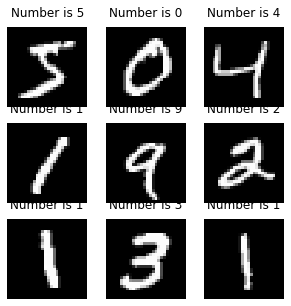

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize =(5, 5))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number is {}'.format(y_train[i]))
fig.show()

The number is: 5


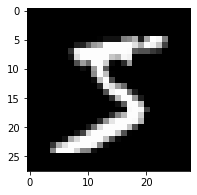

The number is: 0


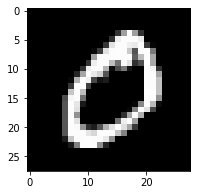

The number is: 4


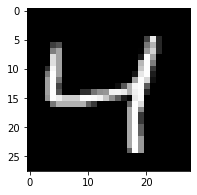

The number is: 1


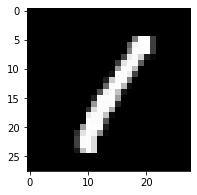

The number is: 9


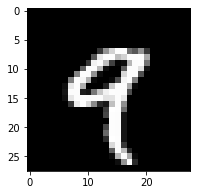

In [ ]:
for i in range(0,5):
  plt.figure(figsize=(3,3))
  plt.imshow(x_train[i])
  print("The number is:", y_train[i])
  plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.shape)
print(x_train.ndim)

(60000, 28, 28, 1)
4


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("x_train Shape: ", x_train.shape)
print("Number of images in x_train: ", x_train.shape[0])
print("Number of images in x_test: ", x_test.shape[0])

x_train Shape:  (60000, 28, 28, 1)
Number of images in x_train:  60000
Number of images in x_test:  10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x = x_train, y = y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 34s 17ms/step - loss: 0.2094 - accuracy: 0.9368
Epoch 2/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0861 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0601 - accuracy: 0.9813


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0553 - accuracy: 0.9836


[0.055345263332128525, 0.9836000204086304]

In [ ]:
p=model.predict(x_test)
print(p[0])

[5.8543876e-08 1.6090412e-07 9.6255724e-07 5.6998565e-06 4.6427923e-10
 1.2419591e-09 4.2274344e-12 9.9998927e-01 1.4849924e-07 3.7204661e-06]
